In [1]:
# Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [56]:
#Load the Netflix dataset
netflix=pd.read_csv("../Netflix Dataset.csv")

In [57]:
#See the first few rows
netflix.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [52]:
# Shape of dataset
print("Rows:", netflix.shape[0])
print("Columns:", netflix.shape[1])

# Column types and null values
netflix.info()

# Summary statistics
netflix.describe(include="all").T


Rows: 7787
Columns: 11
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   category      7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   release_date  0 non-null      Int64 
 7   rating        7787 non-null   object
 8   duration      7787 non-null   object
 9   type          7787 non-null   object
 10  description   7787 non-null   object
dtypes: Int64(1), object(10)
memory usage: 737.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,7787,4051,Unknown,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7787,6832,Unknown,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7787,682,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
rating,7787,15,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,492,Documentaries,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#check for missing values
print(netflix.isnull().sum())

#check for duplicates
print(netflix.duplicated().sum())

show_id            0
category           0
title              0
director           0
cast               0
country            0
release_date    7787
rating             0
duration           0
type               0
description        0
dtype: int64
0


In [ ]:
#check unique values in key columns
print(netflix['Type'].unique())
print(netflix['Rating'].unique())

['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Romantic Movies' 'Documentaries, Spo

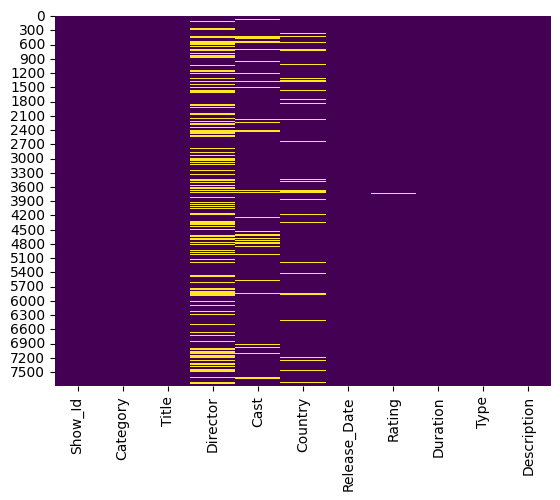

In [ ]:
#count of missing values
sns.heatmap(netflix.isnull(), cbar=False, cmap="viridis")
plt.show()

In [61]:
#Step:2 Data cleaning

#Drop duplicates
netflix.drop_duplicates(inplace=True)

In [62]:
#Clean column names
netflix.columns=netflix.columns.str.strip().str.lower().str.replace(' ','_')
netflix.head(2)


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
#Handle missing values
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna('Unknown', inplace=True)
netflix['rating'].fillna('Not Rated', inplace=True)

C:\Users\devika\AppData\Local\Temp\ipykernel_14088\498810184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix['director'].fillna('Unknown', inplace=True)
C:\Users\devika\AppData\Local\Temp\ipykernel_14088\498810184.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [64]:
#Drop rows with too many missing values
netflix.dropna(subset=['title', 'type'], inplace=True)


In [ ]:
#backup
netflix['release_date_backup'] = netflix['release_date']


In [ ]:
#restore original data
netflix['release_date'] = netflix['release_date_backup']


In [ ]:
#covert data type
netflix['release_date'] = pd.to_datetime(netflix['release_date_backup'], errors='coerce')


In [ ]:
#check the difference
print(netflix[['release_date_backup', 'release_date']].head())


  release_date_backup release_date
0     August 14, 2020   2020-08-14
1   December 23, 2016   2016-12-23
2   December 20, 2018   2018-12-20
3   November 16, 2017   2017-11-16
4     January 1, 2020   2020-01-01


In [ ]:
#overview of columns after data cleaning
netflix.info()
netflix.isnull().sum()
netflix.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   category      7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   release_date  7787 non-null   object
 7   rating        7787 non-null   object
 8   duration      7787 non-null   object
 9   type          7787 non-null   object
 10  description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Replace null values
netflix['release_date'].fillna('unknown', inplace=True)

NameError: name 'netflix' is not defined

In [96]:
#saving the cleaned data
netflix.to_csv("../cleaned_netflix.csv", index=False)
print("Cleaned data saved successfully")

Cleaned data saved successfully
